In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [16]:
df = pd.read_csv("C:/Users/DSC-GDP075/Desktop/the new phase/week5&6 and capston/results data/Top diseas in KSA.csv")
df.head()

,DIM_COUNTRY_CODE,DIM_YEAR_CODE,DIM_GHECAUSE_TITLE,DIM_SEX_CODE,VAL_DTHS_RATE100K_NUMERIC
0,SAU,2021,HIV/AIDS,BTSX,0.27
1,SAU,2021,Acute hepatitis B,BTSX,0.15
2,SAU,2021,Onchocerciasis,BTSX,0.00
3,SAU,2021,Yellow fever,BTSX,0.00
4,SAU,2021,Protein-energy malnutrition,BTSX,0.18


### Data Cleaning 

In [3]:
print(df.isnull().sum())
print(df.dtypes)
df['VAL_DTHS_RATE100K_NUMERIC'] = pd.to_numeric(df['VAL_DTHS_RATE100K_NUMERIC'], errors='coerce')

DIM_COUNTRY_CODE             0
DIM_YEAR_CODE                0
DIM_GHECAUSE_TITLE           0
DIM_SEX_CODE                 0
VAL_DTHS_RATE100K_NUMERIC    0
dtype: int64
DIM_COUNTRY_CODE              object
DIM_YEAR_CODE                  int64
DIM_GHECAUSE_TITLE            object
DIM_SEX_CODE                  object
VAL_DTHS_RATE100K_NUMERIC    float64
dtype: object


### EDA 

In [4]:
print(df['VAL_DTHS_RATE100K_NUMERIC'].describe())
df['VAL_DTHS_RATE100K_NUMERIC'].info()

count    134.000000
mean       1.802313
std        5.689047
min        0.000000
25%        0.000000
50%        0.070000
75%        0.910000
max       47.210000
Name: VAL_DTHS_RATE100K_NUMERIC, dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 134 entries, 0 to 133
Series name: VAL_DTHS_RATE100K_NUMERIC
Non-Null Count  Dtype  
--------------  -----  
134 non-null    float64
dtypes: float64(1)
memory usage: 1.2 KB


In [5]:
#Top ten causes of death
top10 = df.sort_values(by='VAL_DTHS_RATE100K_NUMERIC', ascending=False).head(10)
top10[['DIM_GHECAUSE_TITLE', 'VAL_DTHS_RATE100K_NUMERIC']]
# We can observe that the top causes are Kidney diseases and Diabetes mellitus

,DIM_GHECAUSE_TITLE,VAL_DTHS_RATE100K_NUMERIC
49,Ischaemic heart disease,47.21
76,COVID-19,26.86
68,Kidney diseases,21.10
119,Hypertensive heart disease,20.70
85,Road injury,18.45
8,Diabetes mellitus,13.72
33,Stroke,9.14
34,Cirrhosis of the liver,9.00
56,Lower respiratory infections,7.37
104,Congenital anomalies,6.24


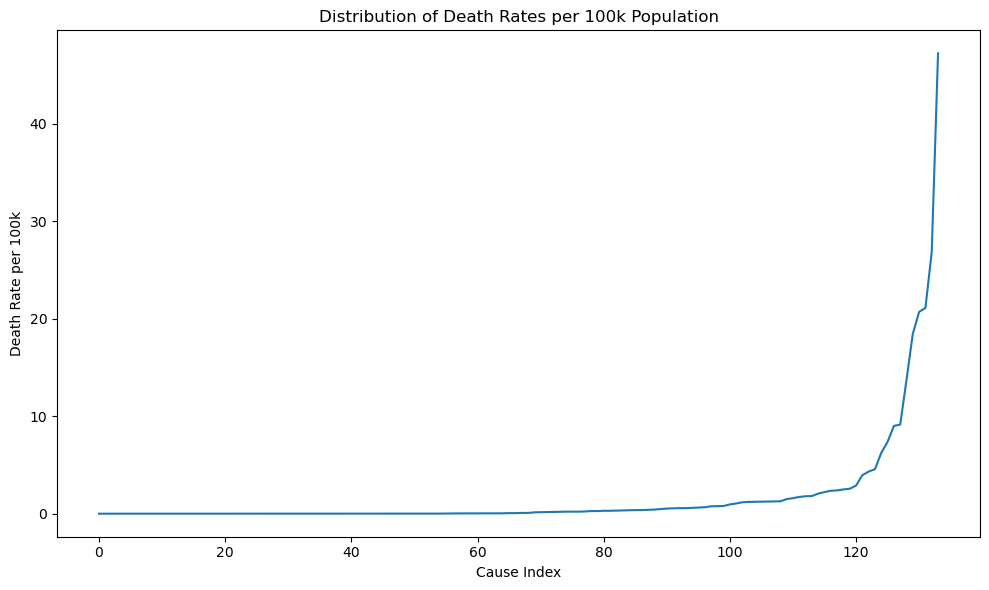

In [6]:
vals = np.sort(df['VAL_DTHS_RATE100K_NUMERIC'].values)
plt.figure(figsize=(10,6))
plt.plot(vals)             
plt.title("Distribution of Death Rates per 100k Population")
plt.xlabel("Cause Index")
plt.ylabel("Death Rate per 100k")

plt.tight_layout()
plt.show()


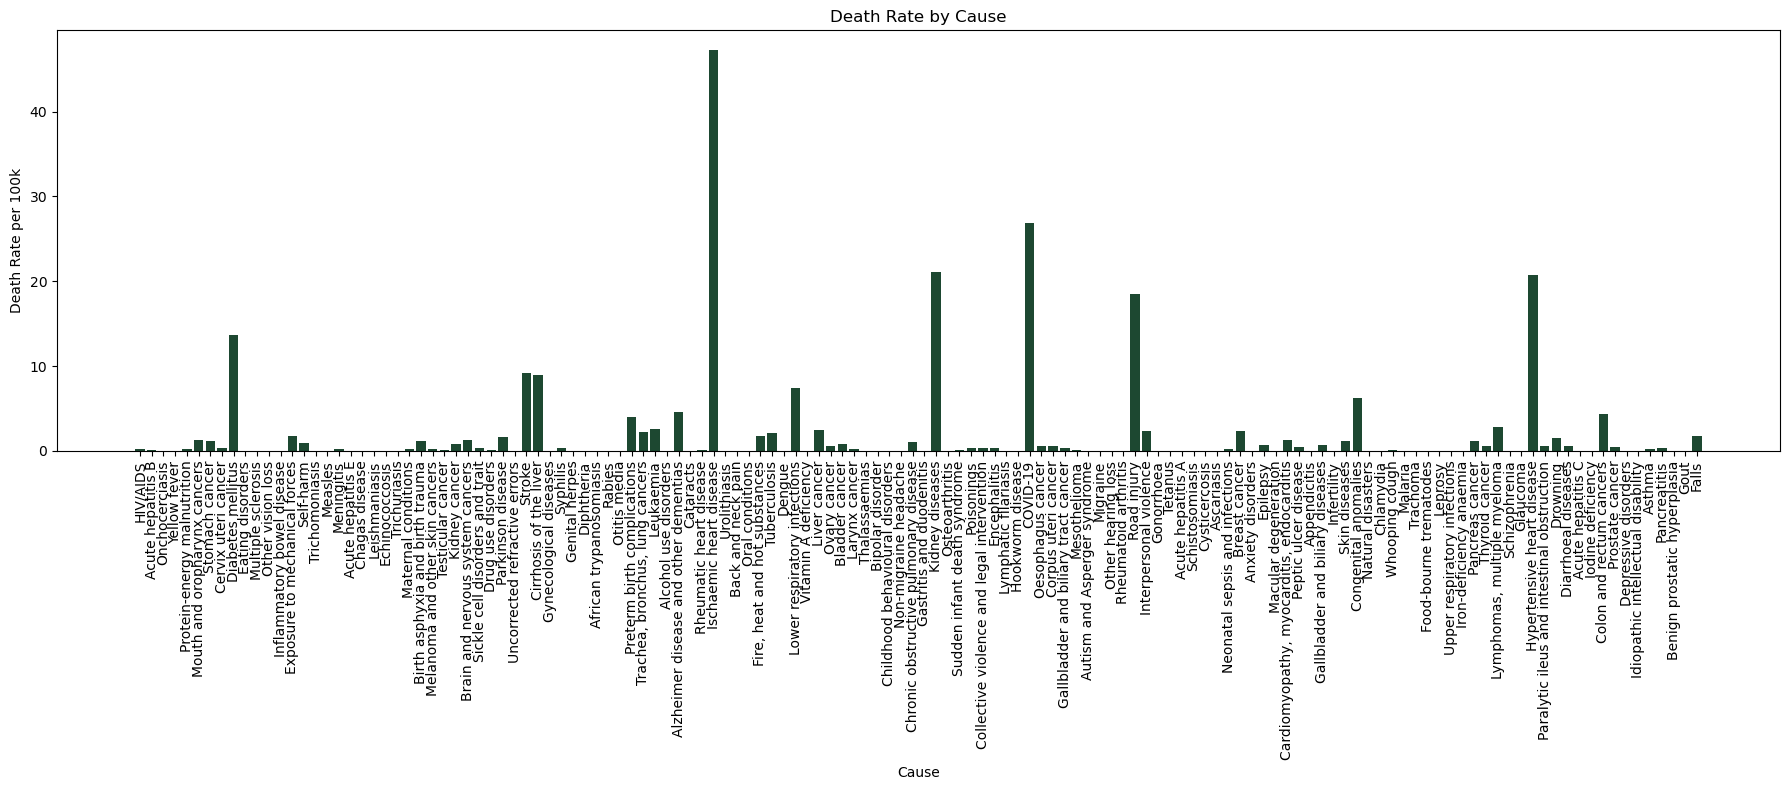

In [7]:
plt.figure(figsize=(18,8))
plt.bar(df['DIM_GHECAUSE_TITLE'], df['VAL_DTHS_RATE100K_NUMERIC'],color="#1D4831")
plt.xticks(rotation=90)
plt.xlabel("Cause")
plt.ylabel("Death Rate per 100k")
plt.title("Death Rate by Cause")
plt.tight_layout()
plt.show()

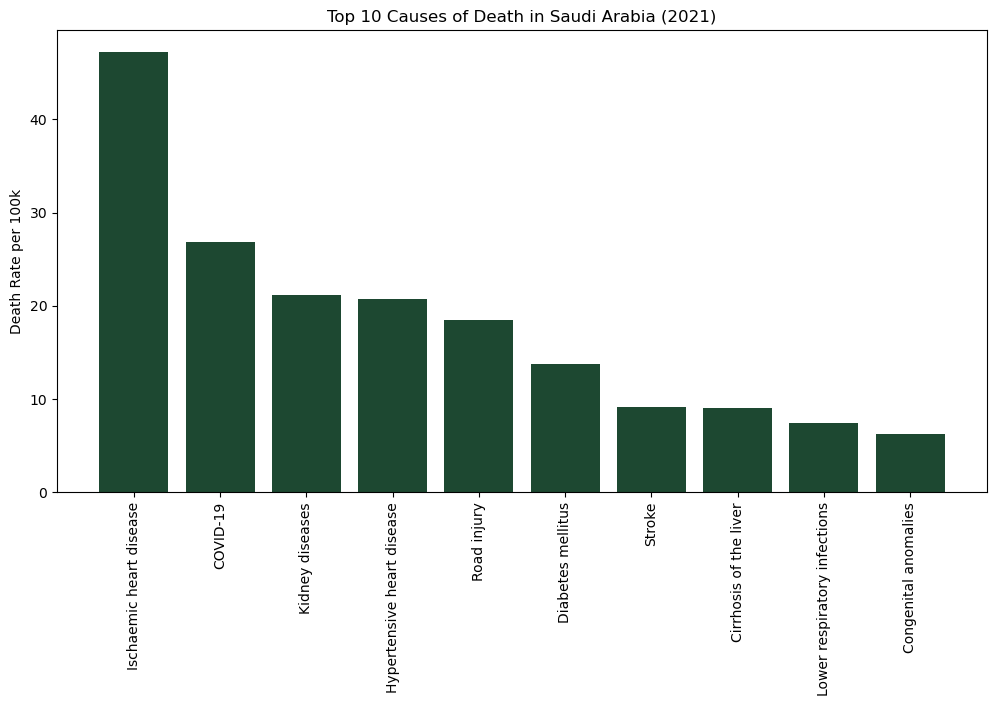

In [8]:
plt.figure(figsize=(12,6))
plt.bar(top10['DIM_GHECAUSE_TITLE'], top10['VAL_DTHS_RATE100K_NUMERIC'], color="#1D4831")
plt.xticks(rotation=90)
plt.title("Top 10 Causes of Death in Saudi Arabia (2021)")
plt.ylabel("Death Rate per 100k")
plt.show()

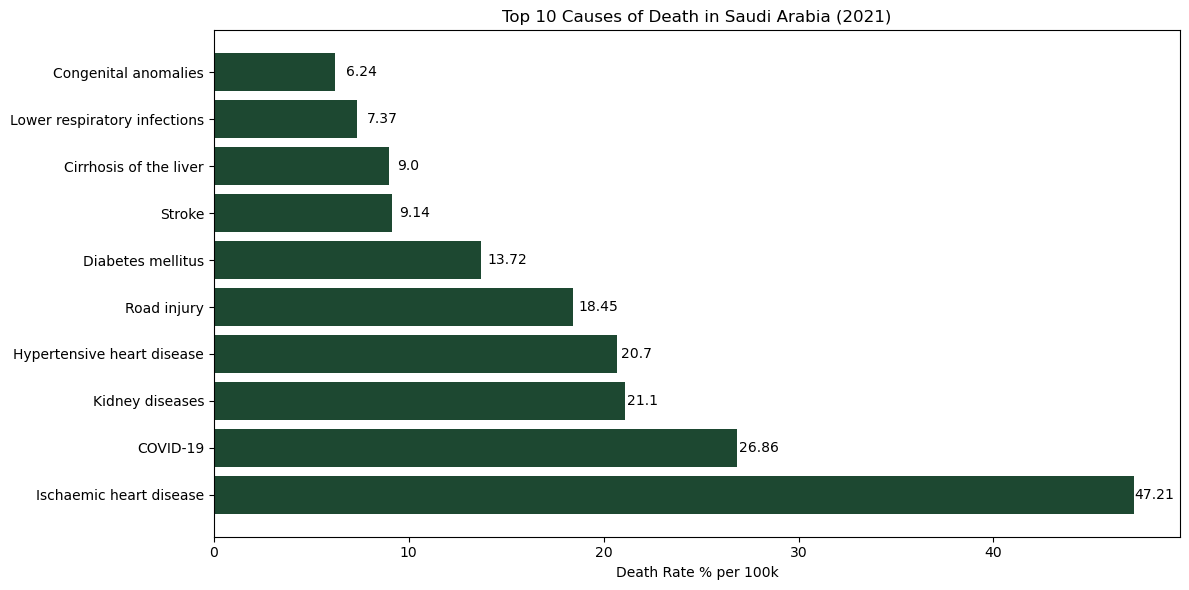

In [9]:
plt.figure(figsize=(12,6))
plt.barh(top10['DIM_GHECAUSE_TITLE'], top10['VAL_DTHS_RATE100K_NUMERIC'], color="#1D4831")

for i, v in enumerate(top10['VAL_DTHS_RATE100K_NUMERIC']):
    plt.text(v+ i* 0.06, i, str(v), va='center', ha='left')
    
plt.title("Top 10 Causes of Death in Saudi Arabia (2021)")
plt.xlabel("Death Rate % per 100k")
plt.tight_layout()
plt.show()


In [10]:
# Highest mortality cause
highest = df[df['VAL_DTHS_RATE100K_NUMERIC'] == df['VAL_DTHS_RATE100K_NUMERIC'].max()]
print(highest[['DIM_GHECAUSE_TITLE', 'VAL_DTHS_RATE100K_NUMERIC']])

         DIM_GHECAUSE_TITLE  VAL_DTHS_RATE100K_NUMERIC
49  Ischaemic heart disease                      47.21


In [11]:
df.groupby('DIM_GHECAUSE_TITLE')['VAL_DTHS_RATE100K_NUMERIC'].sum()


DIM_GHECAUSE_TITLE
Acute hepatitis A               0.03
Acute hepatitis B               0.15
Acute hepatitis C               0.02
Acute hepatitis E               0.00
African trypanosomiasis         0.00
                                ... 
Upper respiratory infections    0.00
Urolithiasis                    0.00
Vitamin A deficiency            0.00
Whooping cough                  0.06
Yellow fever                    0.00
Name: VAL_DTHS_RATE100K_NUMERIC, Length: 134, dtype: float64

In [12]:
df['proportion'] = df['VAL_DTHS_RATE100K_NUMERIC'] / df['VAL_DTHS_RATE100K_NUMERIC'].sum() * 100
df.sort_values(by='proportion', ascending=False).head(10)

,DIM_COUNTRY_CODE,DIM_YEAR_CODE,DIM_GHECAUSE_TITLE,DIM_SEX_CODE,VAL_DTHS_RATE100K_NUMERIC,proportion
49,SAU,2021,Ischaemic heart disease,BTSX,47.21,19.547845
76,SAU,2021,COVID-19,BTSX,26.86,11.121693
68,SAU,2021,Kidney diseases,BTSX,21.10,8.736698
119,SAU,2021,Hypertensive heart disease,BTSX,20.70,8.571074
85,SAU,2021,Road injury,BTSX,18.45,7.639435
8,SAU,2021,Diabetes mellitus,BTSX,13.72,5.680924
33,SAU,2021,Stroke,BTSX,9.14,3.784522
34,SAU,2021,Cirrhosis of the liver,BTSX,9.00,3.726554
56,SAU,2021,Lower respiratory infections,BTSX,7.37,3.051633
104,SAU,2021,Congenital anomalies,BTSX,6.24,2.583744


In [13]:
#To see how many causes account for 80% of deaths
df_sorted = df.sort_values('VAL_DTHS_RATE100K_NUMERIC', ascending=False)
df_sorted['cumulative'] = df_sorted['proportion'].cumsum()
df_sorted.head(15)

,DIM_COUNTRY_CODE,DIM_YEAR_CODE,DIM_GHECAUSE_TITLE,DIM_SEX_CODE,VAL_DTHS_RATE100K_NUMERIC,proportion,cumulative
49,SAU,2021,Ischaemic heart disease,BTSX,47.21,19.547845,19.547845
76,SAU,2021,COVID-19,BTSX,26.86,11.121693,30.669537
68,SAU,2021,Kidney diseases,BTSX,21.10,8.736698,39.406236
119,SAU,2021,Hypertensive heart disease,BTSX,20.70,8.571074,47.977309
85,SAU,2021,Road injury,BTSX,18.45,7.639435,55.616745
8,SAU,2021,Diabetes mellitus,BTSX,13.72,5.680924,61.297669
33,SAU,2021,Stroke,BTSX,9.14,3.784522,65.082191
34,SAU,2021,Cirrhosis of the liver,BTSX,9.00,3.726554,68.808745
56,SAU,2021,Lower respiratory infections,BTSX,7.37,3.051633,71.860378
104,SAU,2021,Congenital anomalies,BTSX,6.24,2.583744,74.444122


In [14]:
df_g= pd.read_csv("C:/Users/DSC-GDP075/Desktop/the new phase/week5&6 and capston/results data/Top diseas in KSA.csv")
disease_map = {
    "HIV/AIDS": "Communicable",
    "Acute hepatitis B": "Communicable",
    "Onchocerciasis": "Communicable",
    "Yellow fever": "Communicable",
    "Protein-energy malnutrition": "Communicable",
    "Meningitis": "Communicable",
    "Tuberculosis": "Communicable",
    "Lower respiratory infections": "Communicable",
    "Diarrhoeal diseases": "Communicable",
    "Malaria": "Communicable",
    "COVID-19": "Communicable",
    
    "Diabetes mellitus": "Non-communicable",
    "Kidney diseases": "Non-communicable",
    "Ischaemic heart disease": "Non-communicable",
    "Stroke": "Non-communicable",
    "Liver cancer": "Non-communicable",
    "Breast cancer": "Non-communicable",
    "Pancreas cancer": "Non-communicable",
    "Colon and rectum cancers": "Non-communicable",
    "Alzheimer disease and other dementias": "Non-communicable",
    "Hypertensive heart disease": "Non-communicable",
    "Asthma": "Non-communicable",
    "Chronic obstructive pulmonary disease": "Non-communicable",

    "Road injury": "Injuries",
    "Drowning": "Injuries",
    "Falls": "Injuries",
    "Fire, heat and hot substances": "Injuries",
    "Collective violence and legal intervention": "Injuries",
    "Interpersonal violence": "Injuries",
    "Exposure to mechanical forces": "Injuries"
}

df_g['Disease_Type'] = df_g['DIM_GHECAUSE_TITLE'].map(disease_map).fillna("Other")

group_summary = df_g.groupby('Disease_Type')['VAL_DTHS_RATE100K_NUMERIC'].sum().reset_index()
group_summary



,Disease_Type,VAL_DTHS_RATE100K_NUMERIC
0,Communicable,37.79
1,Injuries,27.96
2,Non-communicable,128.12
3,Other,47.64
